## Helpers

In [1]:
import os
import requests
import time
from dotenv import load_dotenv

load_dotenv()

API_KEY = os.environ["API_KEY"]
URL_QUERY = "https://%s.crucible.dreadnode.io/score"
URL_FLAG = "https://crucible.dreadnode.io/api/challenges/%s/submit-flag"
URL_ARTIFACT = "https://crucible.dreadnode.io/api/artifacts/%s/%s"
DIR_ARTIFACTS = "./artifacts"
DIR_DATA = "./data"

def query(data, challenge, key="data"):
    backoff = 1
    while True:
        try:
            response = requests.post(
                URL_QUERY % challenge,
                headers={ "X-API-Key": API_KEY },
                json={ key: data }
            )
            return response.json()
        except KeyboardInterrupt:
            return None
        except:
            time.sleep(backoff * 2)
            backoff += 1

def submit(flag, challenge):
    response = requests.post(
        URL_FLAG % challenge,
        headers={ "X-API-Key": API_KEY },
        json={ "challenge": challenge, "flag": flag }
    )
    return False if response.status_code != 200 else response.json().get("correct")

def get_artifacts(challenge, artifacts=[]):
    for artifact in artifacts:
        response = requests.get(
            URL_ARTIFACT % (challenge, artifact),
            headers={ "X-API-Key": API_KEY }
        )
        if response.status_code == 200:
            with open(os.path.join(DIR_ARTIFACTS, artifact), "wb") as f:
                f.write(response.content)
            print(f"{artifact} downloaded")
        else:
            print(f"{artifact} not downloaded")

## Challenge

In [2]:
CHALLENGE = "taxi"
#submit("", CHALLENGE)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet(os.path.join(DIR_ARTIFACTS, "taxi.parquet"))

In [7]:
values = ["Grand Central", "Railway Station", "Library", "North Station", "Omega Mall", "Opera House"]

In [8]:
df[df["pickup_location"].isin(values)]

,ride_id,pickup_time,pickup_location,dropoff_location,driver_id,passenger_count,fare_amount,tip_amount,payment_type,rating,ride_duration_minutes,dropoff_time,signal_north,signal_south
0,1,2024-01-01 00:00:00,Library,Tech Hub,63,3,17.790,12.52,Cash,1,80,2024-01-01 01:20:00,85.0,15.0
1200,1201,2024-01-05 04:00:00,North Station,Theater District,49,4,73.275,14.76,Cash,5,68,2024-01-05 04:30:00,85.0,15.0
1800,1801,2024-01-07 06:00:00,Grand Central,Entertainment Zone,43,4,56.350,13.61,Credit Card,5,105,2024-01-07 07:45:00,85.0,15.0
2400,2401,2024-01-09 08:00:00,Railway Station,Tech Hub,51,2,52.860,9.15,Cash,5,5,2024-01-09 08:05:00,85.0,15.0


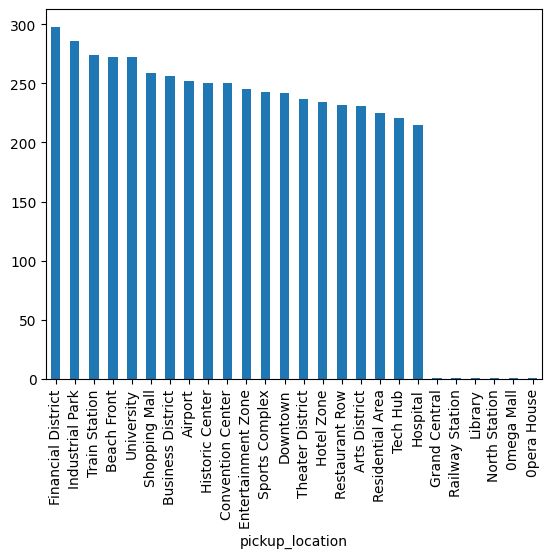

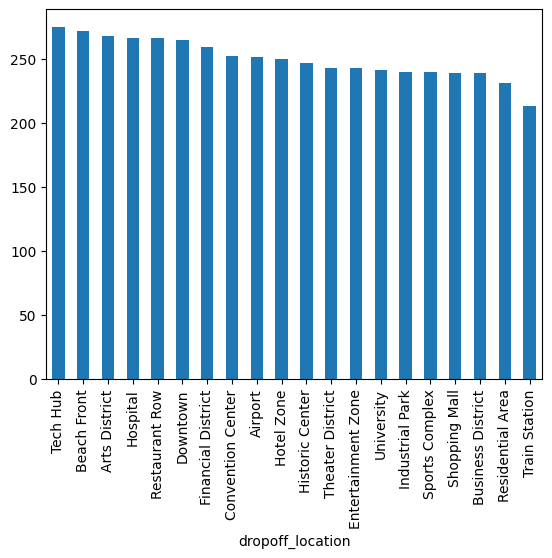

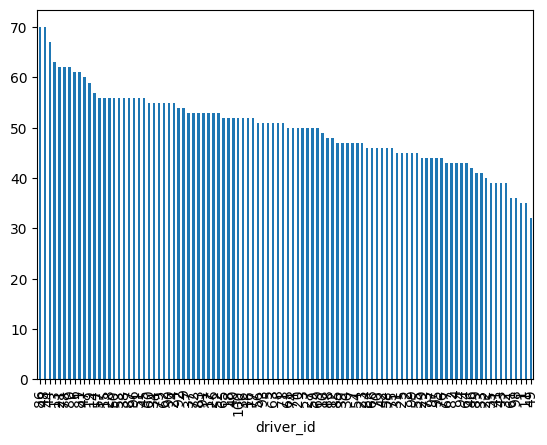

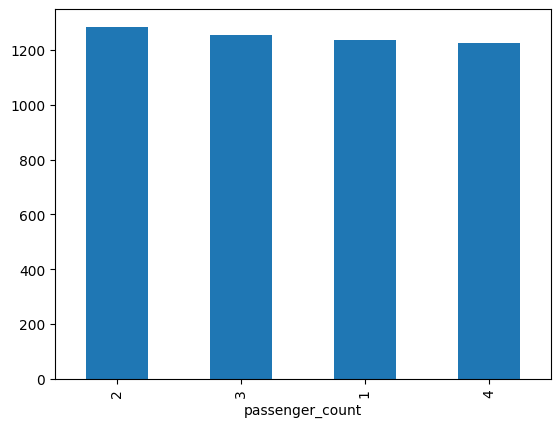

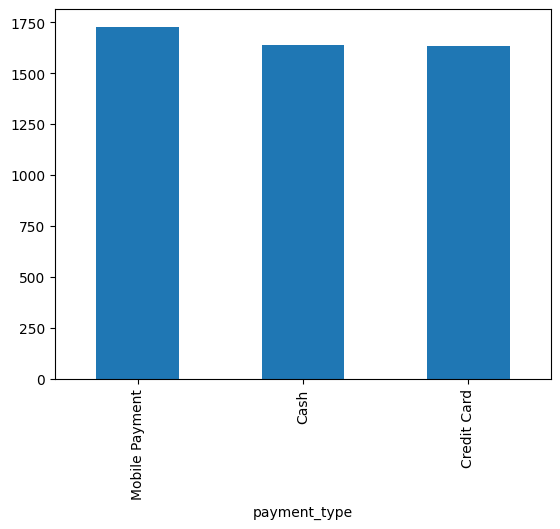

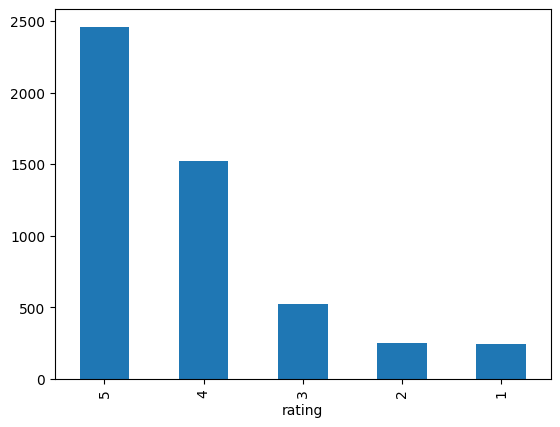

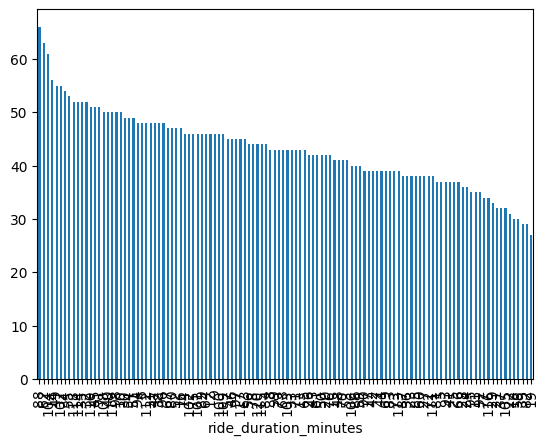

In [ ]:
for column in ["pickup_location", "dropoff_location", "driver_id", "passenger_count", "payment_type", "rating", "ride_duration_minutes"]:
    plt.figure()
    df[column].value_counts().plot(kind="bar")
    plt.show()